### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially the company wants :
- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### 1. Importing Libraries

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Understanding and Exploration

In [2]:
# reading the dataset
bike_sharing_df = pd.read_csv('day.csv')

In [3]:
# Check the first few rows of the dataset
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the shape of  the dataset
bike_sharing_df.shape

(730, 16)

In [5]:
# Understanding the dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the details 
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 3. Checking the NULL/MISSING values

In [7]:
# checking the percentage of null values
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### <font color = 'green'> Conclusion</font> : 
No missing/Null values found

In [8]:
#### Checking for duplicate values

bike_dup = bike_sharing_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [9]:
bike_sharing_df.shape

(730, 16)

### <font color = 'green'> Conclusion</font> : 
Duplicate values are not present.

### 4. Data Cleaning

In [10]:
# Creating a copy of dataframe without instant column
bike_dummy=bike_sharing_df.iloc[:,1:16]

In [11]:
# Checking value_counts() for entire dataframe.
# This will help to identify any Unknown/Junk values present in the dataset.

for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-11-2019    1
17-11-2019    1
06-03-2018    1
12-02-2018    1
26-03-2018    1
             ..
20-07-2019    1
19-04-2019    1
06-07-2019    1
05-07-2019    1
27-06-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



1    365
0    365
Name: yr, dtype: int64 



12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145

### <font color = 'green'> Conclusion</font> : 
There seems to be no Junk/Unknown values in the entire dataset.

### 5. Removing redundant and unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : Its only an index value , we have a default index for the same purpose

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column .

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [12]:
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
bike_new=bike_sharing_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [14]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### 6. Visualising the data

In [15]:
# we will visualize our data using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

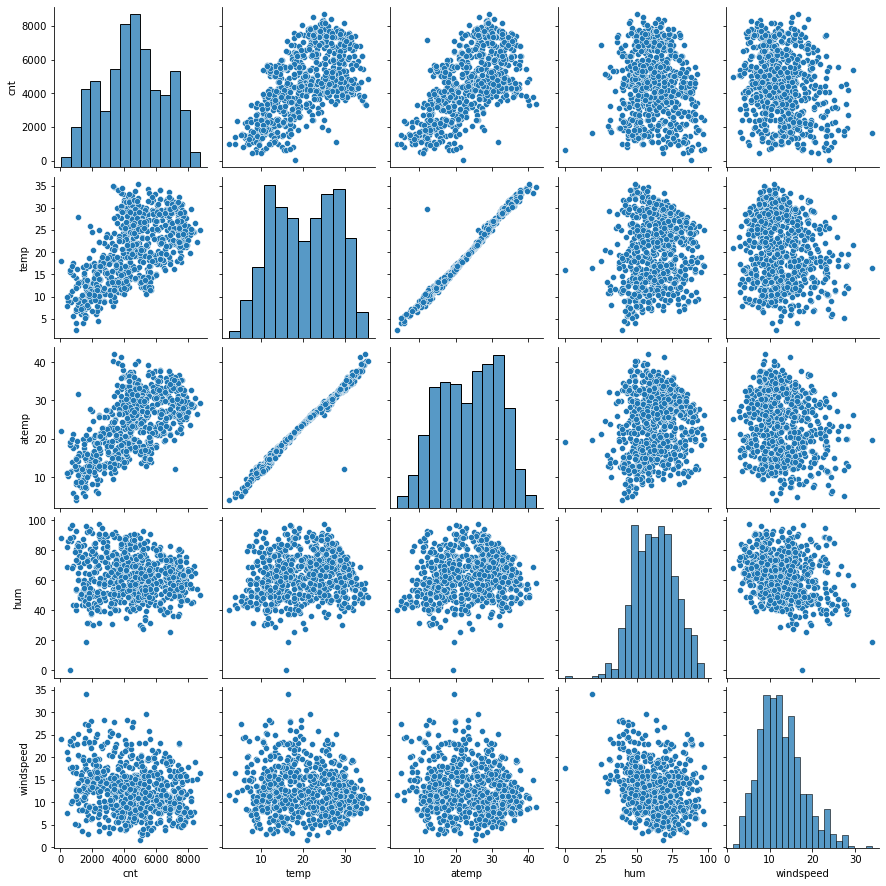

In [16]:
# Visualising Numeric Variables : Using a pairplot
sns.pairplot(data = bike_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### <font color = 'green'> Conclusion</font> : 
we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

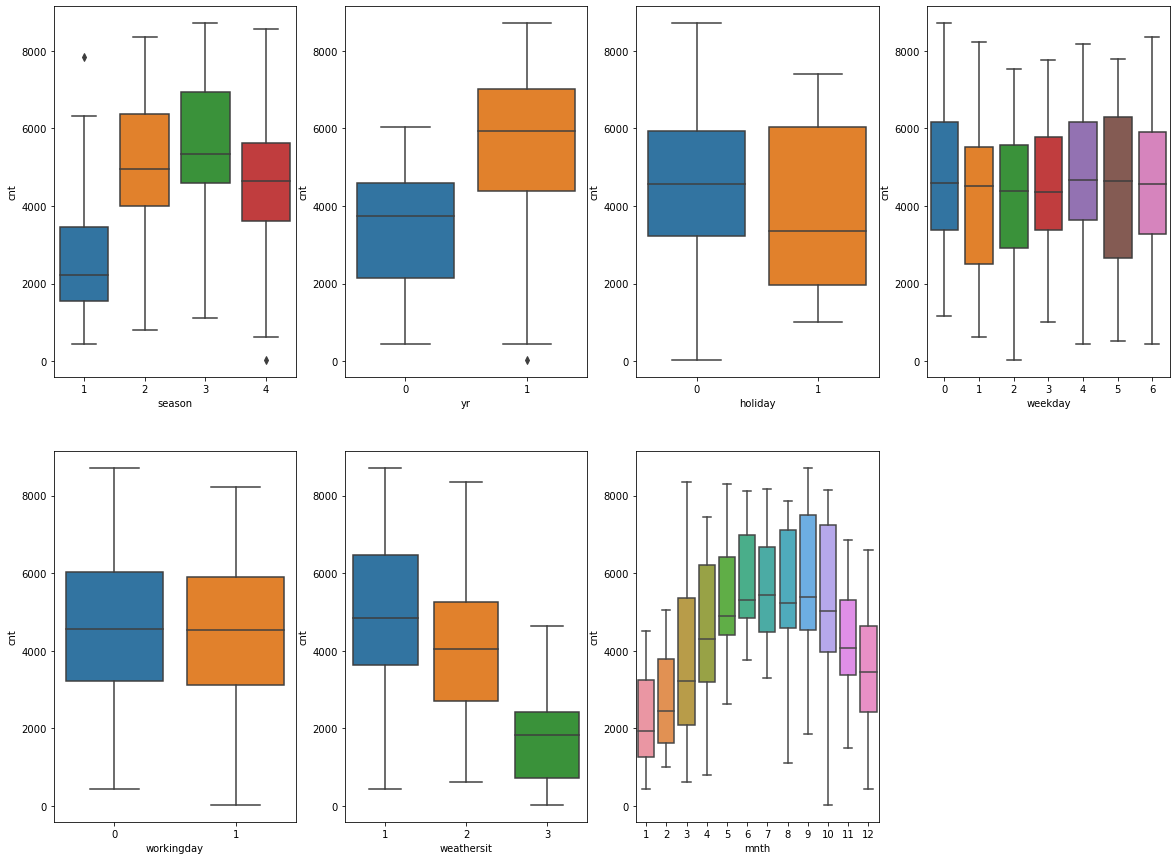

In [17]:
# Visualising Categorical Variables : Using a Boxplot

plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.show()

### <font color = 'green'> Conslusions: </font>
- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring .
- The year 2019 had a higher count of users as compared to the year 2018
- The bike demand is almost constant throughout the week.
- The count of total users is in between 4000 to 6000 (~5500) during clear weather
- The count is highest in the month of August
- The count of users is less during the holidays

### 7. Data Preparation

Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [18]:
import calendar
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [19]:
# Maping seasons
bike_new.season = bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [20]:
# Mapping weathersit
bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [21]:
# Mapping Weekday
bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [22]:
# Checking the dataframe
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### 8. Creating Dummy Variables

- The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
- We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [23]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_new[['season','mnth','weekday','weathersit']]

In [24]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [25]:
# Adding the dummy variables to the original dataset
bike_new = pd.concat([dummy,bike_new],axis = 1)

In [26]:
# Checking the dataframe
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike_new.drop(['season'],axis=1,inplace=True)
bike_new.drop(['weathersit'],axis=1,inplace=True)
bike_new.drop(['weekday'],axis=1,inplace=True)
bike_new.drop(['mnth'],axis=1,inplace=True)

bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
bike_new.shape

(730, 30)

In [29]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

### 9. Splitting the Data into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
test.shape

(219, 30)

In [32]:
train.shape

(510, 30)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

### 10. Rescaling the features

Although scaling doesnot impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc.So it is extremely important to rescale the variables so that they have a comparable scale. 

In this case, we will use MinMax scaling.

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [36]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [37]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


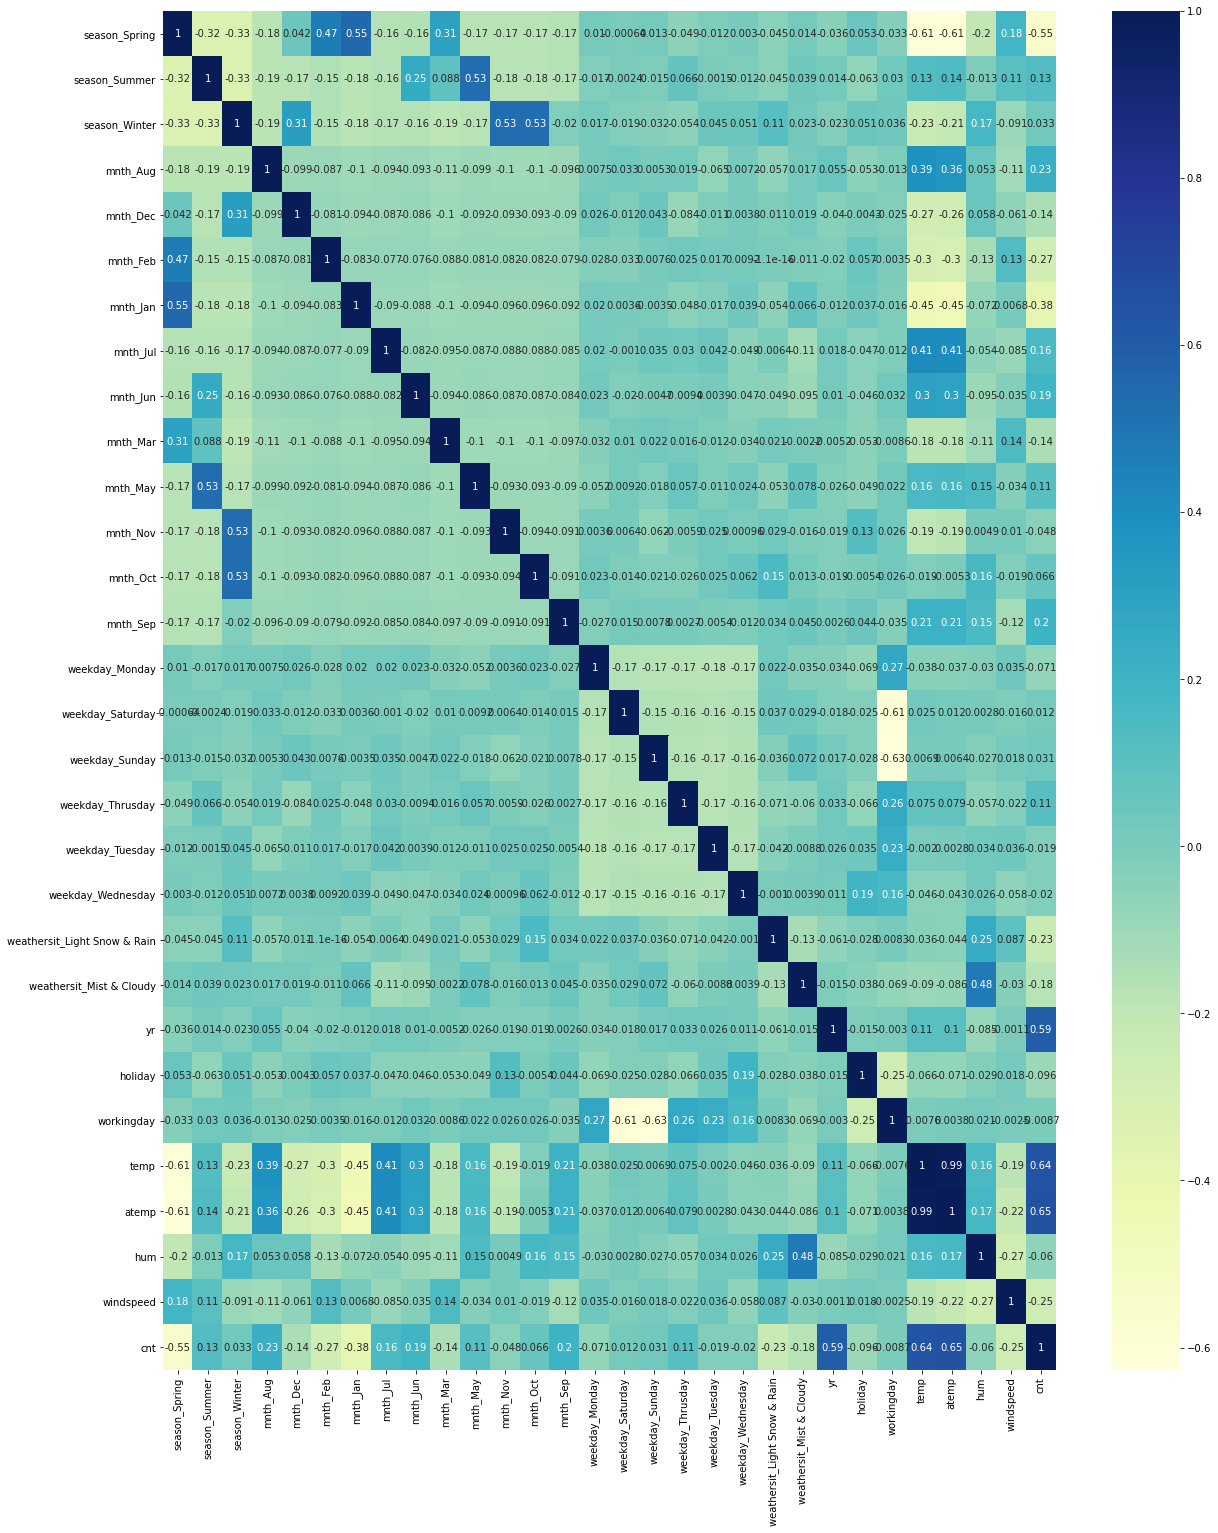

In [38]:
# Checking the coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### <font color = 'green'> Conclusion: </font>
`atemp` and `temp` seems to be correlated to the target variable `cnt`. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

### 11. Dividing into X and Y sets for the model building

In [39]:
y_train = train.pop('cnt')
X_train = train

In [40]:
y_train.shape

(510,)

### 12. Building a linear model

APPROACH USED :
- We will use a mixed approach to build the model.
- Here we are using `RFE` approach for feature selection and then we will use the `statsmodel` approach for building the model 

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

### 13. Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# For statsmodels, we need to explicitly fit a constant using sm.add_constant(X).
# If we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe) 

In [48]:
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475


### 14. Running the linear model

In [49]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [50]:
# Check the parameters obtained
lm_1.params

const                           0.320243
season_Spring                  -0.061737
season_Summer                   0.040767
season_Winter                   0.103435
mnth_Dec                       -0.037199
mnth_Jan                       -0.043748
mnth_Jul                       -0.055495
mnth_Nov                       -0.040949
mnth_Sep                        0.074891
weathersit_Light Snow & Rain   -0.248116
weathersit_Mist & Cloudy       -0.055876
yr                              0.230328
holiday                        -0.091228
temp                            0.479977
hum                            -0.160227
windspeed                      -0.188457
dtype: float64

In [51]:
# Summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.34e-189
Time:                        19:42:40   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### <font color = 'green'> Conclusion : </font>
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model. 

### 15. Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
1,season_Spring,5.27
13,temp,4.42
3,season_Winter,3.83
2,season_Summer,2.76
14,hum,1.93
7,mnth_Nov,1.76
5,mnth_Jan,1.68
10,weathersit_Mist & Cloudy,1.57
4,mnth_Dec,1.49


In [53]:
# We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
# dropping `const` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [54]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
0,season_Spring,4.37
2,season_Winter,4.06
1,season_Summer,2.81
9,weathersit_Mist & Cloudy,2.32
10,yr,2.09
6,mnth_Nov,1.83
4,mnth_Jan,1.75


In [55]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [56]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_Jul,1.59
9,weathersit_Mist & Cloudy,1.56


#### Note:
The VIF value of temp is nearly equal to 5. Hence, we are not dropping this feature.

### 16. Preparing the Final Model

In [57]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [58]:
# Check the summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.57e-186
Time:                        19:42:41   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [59]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_Winter,2.94
0,season_Spring,2.89
1,season_Summer,2.23
10,yr,2.07
6,mnth_Nov,1.80
4,mnth_Jan,1.66
5,mnth_Jul,1.59
9,weathersit_Mist & Cloudy,1.56


### <font color = 'green'> Conclusion: </font> 

Here we see that except for temp(that has a vif value slightly more than 5, that can be ignored) rest all the columns have a vif value less than 5.

Hence, we finalise `lm_2` as the final model to proceed with the future prdeictions.

### 17. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_cnt = lm_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

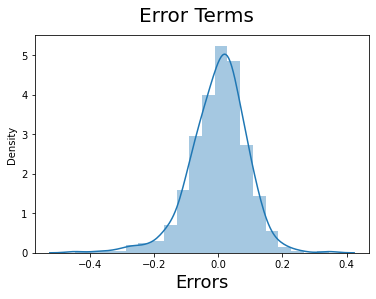

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### <font color = 'green'> Conclusion: </font>

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

### 18. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

In [62]:
# Applying the scaling on the test sets

num_vars = ['cnt','hum','windspeed','temp','atemp']
test[num_vars] = scaler.transform(test[num_vars])

In [63]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### 19. Dividing into X_test and y_test

In [64]:
y_test = test.pop('cnt')
X_test = test

In [65]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

### 20. Predicting using values used by the final model

In [66]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Dec                      219 non-null    uint8  
 5   mnth_Jan                      219 non-null    uint8  
 6   mnth_Jul                      219 non-null    uint8  
 7   mnth_Nov                      219 non-null    uint8  
 8   mnth_Sep                      219 non-null    uint8  
 9   weathersit_Light Snow & Rain  219 non-null    uint8  
 10  weathersit_Mist & Cloudy      219 non-null    uint8  
 11  yr                            219 non-null    int64  
 12  holiday                       219 non-null    int64  
 13  temp

In [67]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test)

### 21. Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8132736736429255

### <font color = 'green'> Conclusion: </font>

We can see that the `r_squared on the test set is 0.813` and the `r-squared on the trained set 0.840` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

### 22. Model Evaluation

Text(0, 0.5, 'y_pred')

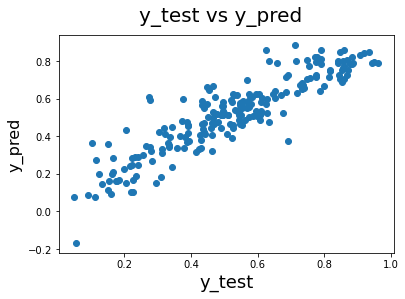

In [69]:
# Plotting the graph for actual versus predicted values.
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### <font color = 'green'> Conclusion: </font> 
We can colude that the final model fit isn't by chance, and has descent predictive power.

In [70]:
# Getting the variable names and the coefficient values for the final equation of the best fitted line
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.437655
0,const,0.246635
11,yr,0.234287
3,season_Winter,0.088652
8,mnth_Sep,0.068219
2,season_Summer,0.033271
7,mnth_Nov,-0.041852
4,mnth_Dec,-0.044529
5,mnth_Jan,-0.050270


### <font color = 'green'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2466 + 0.437 \times  temp + 0.2342  \times  yr + 0.8865 \times season Winter + 0.0682 \times mnth Sept + 0.0033 \times season Summer - 0.0418 \times mnth Nov - 0.04452 \times mnth Dec - 0.0050 \times mnth Jan - 0.0503 \times mnth Jul - 0.0716 \times season Spring - 0.0814 \times weathersit Mist Cloudy - 0.0919 \times holiday - 0.1585 \times windspeed - 0.2928 \times weathersit Light Snow Rain $

#### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
#### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.437655)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.292892)
 - year (0.234287)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

## <font color='green'> Final Recommendations for the Company: </font>

- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand